In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 24 07:49:46 2021

"""

"""
Elastic Net Regression
"""

#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics

In [2]:
#Import the dataset
dataset = pd.read_csv(r'D:\Jacobs\Lecture\PTM\Sources\2021\Regression\Datasets\Fish.csv')
dataset


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Preprocessing

In [3]:
# Encoding categorical data using onehot encoder
onehotencoder = LabelBinarizer()
onehotencoder.fit(dataset.Species)
transformed = onehotencoder.transform(dataset.Species)
ohe_df = pd.DataFrame(transformed)
ohe_df

dataset = pd.concat([ohe_df, dataset], axis=1)
del dataset['Species']
dataset

,0,1,2,3,4,5,6,Weight,Length1,Length2,Length3,Height,Width
0,1,0,0,0,0,0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,0,0,0,0,0,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,0,0,0,0,0,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,0,0,0,0,0,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,0,0,0,0,0,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0,0,0,0,0,1,0,12.2,11.5,12.2,13.4,2.0904,1.3936
155,0,0,0,0,0,1,0,13.4,11.7,12.4,13.5,2.4300,1.2690
156,0,0,0,0,0,1,0,12.2,12.1,13.0,13.8,2.2770,1.2558
157,0,0,0,0,0,1,0,19.7,13.2,14.3,15.2,2.8728,2.0672


Exploratory data analysis

<Figure size 720x720 with 0 Axes>

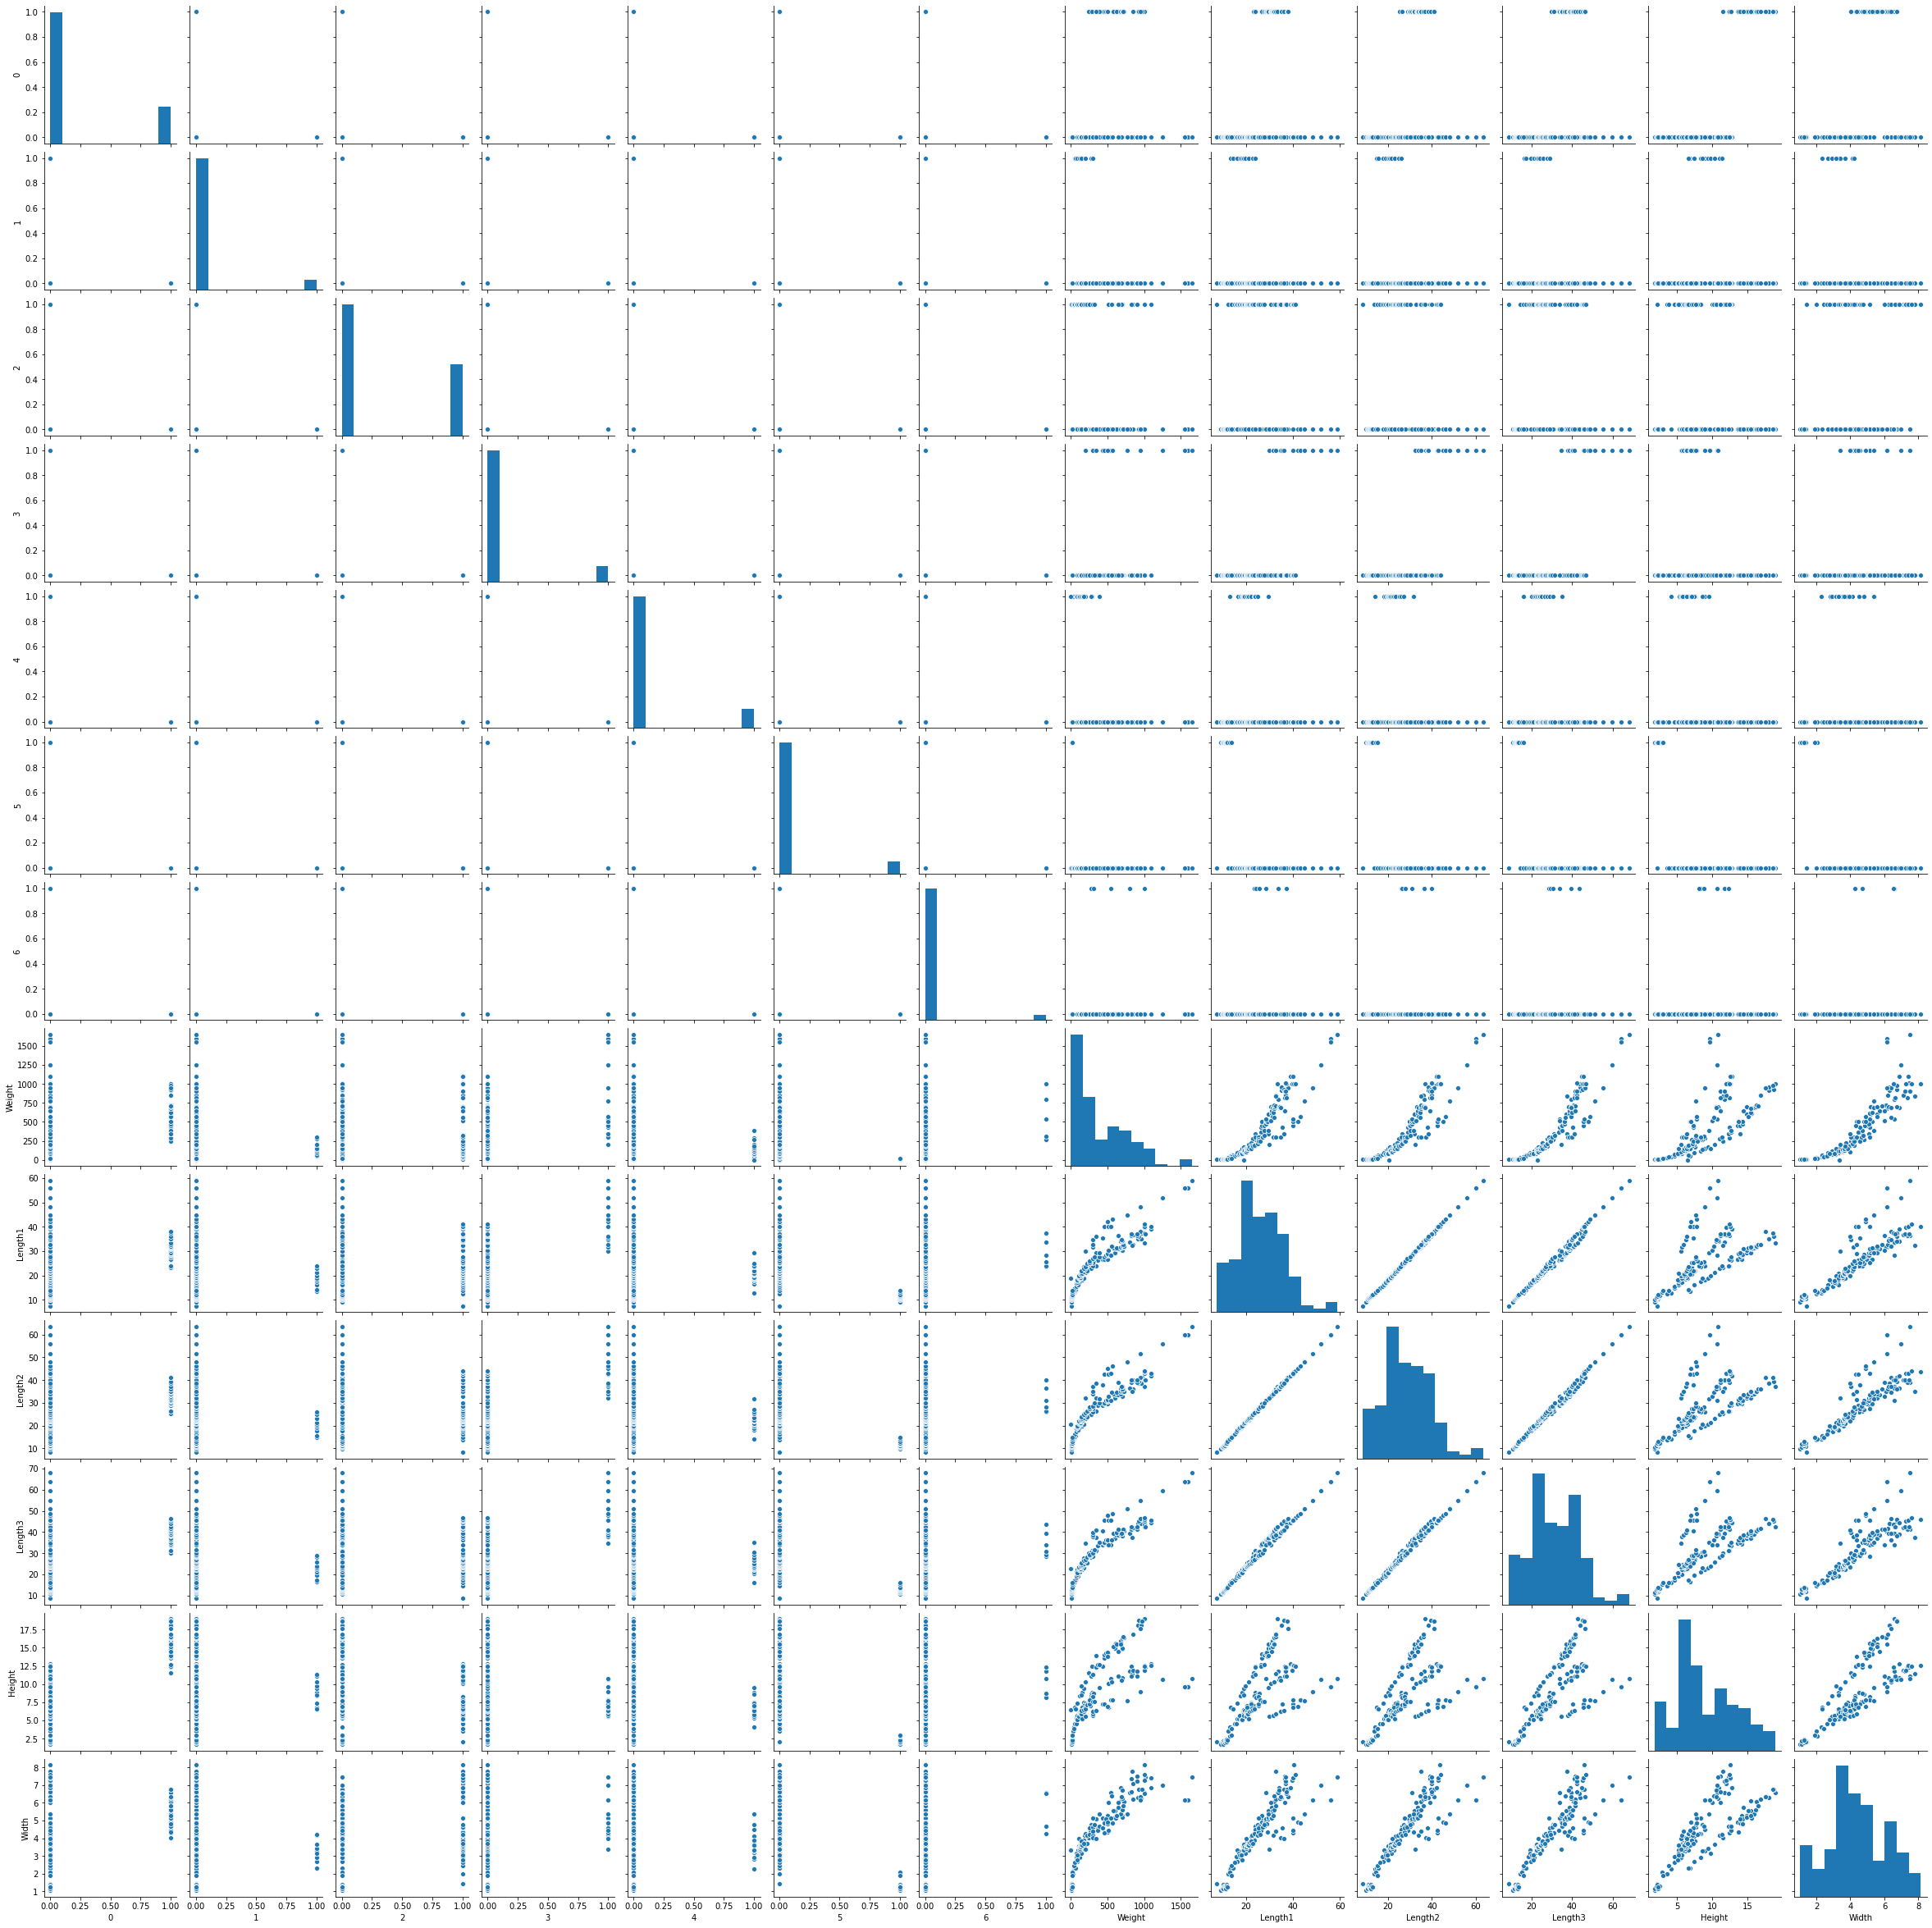

In [4]:
# Exploratory data analytics
plt.figure(figsize=(10, 10))
sns.pairplot(dataset)
plt.show()


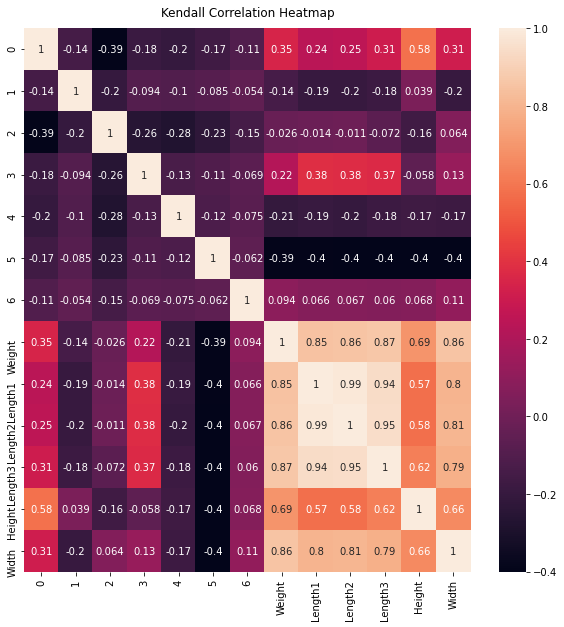

In [5]:
# Draw the correlation heatmaps using seaborn
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(dataset.corr(method='kendall'), annot=True)
heatmap.set_title('Kendall Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

Get X and y, and then split the data

In [6]:
# Get X (independent variables) and y (dependent variable)
X = dataset.iloc[:, np.r_[0:6, 8:13]]
X
y = dataset.iloc[:, 7]
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train.describe()

,0,1,2,3,4,5,Length1,Length2,Length3,Height,Width
count,127.000000,127.000000,127.000000,127.0,127.000000,127.0,127.000000,127.000000,127.000000,127.000000,127.000000
mean,0.275591,0.086614,0.433071,0.0,0.157480,0.0,25.610236,27.826772,30.770079,9.856960,4.642162
std,0.448581,0.282383,0.497463,0.0,0.365696,0.0,7.220757,7.746381,8.692784,4.060827,1.465072
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,7.500000,8.400000,8.800000,2.112000,1.408000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,20.000000,22.000000,23.500000,6.392000,3.540900
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25.000000,26.500000,29.200000,8.876800,4.335000
75%,1.000000,0.000000,1.000000,0.0,0.000000,0.0,31.450000,34.250000,38.650000,12.637000,5.789550
max,1.000000,1.000000,1.000000,0.0,1.000000,0.0,40.200000,43.500000,46.500000,18.957000,8.142000


Linear Regression

In [8]:
# fit Simple Linear Regression to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slopes/coefficients
print(regressor.coef_)

-537.0294351715316
[-1.62266767e+02 -1.20295901e+02  1.22518694e+00  8.17124146e-14
 -9.93468914e+00 -1.42108547e-14  1.45995675e+01  3.42963128e+01
 -3.97466297e+01  6.37341132e+01  5.45244355e+01]


In [9]:
# predict test result
y_pred = regressor.predict(X_test)
y_pred

array([ 931.20209638,  164.47000715,  179.92306189,  215.986263  ,
        288.33504327,  388.92935976,  303.83828877,  395.74112494,
        374.18468886,  478.68138237,  422.18931525,  497.79161519,
        510.82811822,  656.59438908,  831.79738317,  741.38643173,
        741.38643173,  892.89647003, -326.47251788, -303.05136366,
       -314.31988906, -269.69021496, -287.14405397, -296.45967829,
       -276.9392567 , -283.36768764, -280.58278299, -274.10918695,
       -253.45431366, -249.43172974, -162.21836879, -175.66262658])

In [10]:
# create error dataframe
error_df = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE'], index = ['Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'Decision Tree Regression', 'Random Forest Regression'])
error_df

,MAE,MSE,RMSE
Linear Regression,NaN,NaN,NaN
Multiple Linear Regression,NaN,NaN,NaN
Polynomial Regression,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN


In [11]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

error_df.loc['Linear Regression'] = [mae, mse, rmse]
error_df


,MAE,MSE,RMSE
Linear Regression,253.476,108618,329.573
Multiple Linear Regression,NaN,NaN,NaN
Polynomial Regression,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN


Multiple Linear Regression

In [12]:
# === Step 3: Backward Elimination to optimize the model ===
import statsmodels.api as sm

# add the dummy variable ( X-zero) and set the values to ones
X_opt = sm.add_constant(X)
X_opt

,const,0,1,2,3,4,5,Length1,Length2,Length3,Height,Width
0,1.0,1,0,0,0,0,0,23.2,25.4,30.0,11.5200,4.0200
1,1.0,1,0,0,0,0,0,24.0,26.3,31.2,12.4800,4.3056
2,1.0,1,0,0,0,0,0,23.9,26.5,31.1,12.3778,4.6961
3,1.0,1,0,0,0,0,0,26.3,29.0,33.5,12.7300,4.4555
4,1.0,1,0,0,0,0,0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...,...,...,...,...,...
154,1.0,0,0,0,0,0,1,11.5,12.2,13.4,2.0904,1.3936
155,1.0,0,0,0,0,0,1,11.7,12.4,13.5,2.4300,1.2690
156,1.0,0,0,0,0,0,1,12.1,13.0,13.8,2.2770,1.2558
157,1.0,0,0,0,0,0,1,13.2,14.3,15.2,2.8728,2.0672


In [13]:
# the sm.OLS function requires constants
model=sm.OLS(y,X_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           6.85e-82
Time:                        21:54:47   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -824.4580     67.581    -12.200      0.000    -958.014    -690.902
0            -93.8742     96.658     -0.971      0.333    -284.893      97.145
1             70.8485     61.405      1.154      0.250     -50.503     192.200
2             44.0747     52.938      0.833      0.406     -60.544     148.693
3           -302.3035     83.944     -3.601      0.000    -468.197    -136.410
4              9.1658     47.652      0.192      0.848     -85.006     103.337
5            352.1991     62.857      5.603      0.000     227.979     476.419
Length1      -80.3030     36.279     -2.214      0.028    -151.998      -8.608
Length2       79.8886     45.718      1.747      0.083     -10.461     170.238
Length3       32.5354     29.300      1.110      0.269     -25.369      90.439
Height         5.2510     13.056      0.402      0.688     -20.551      31.053
Width         -0.5154     23.913     -0.022      0.983     -47.773      46.742
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.422
Skew:                           1.184   Prob(JB):                     7.00e-22
Kurtosis:                       6.016   Cond. No.                         878.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Remove the variable having highest p value
del X_opt ['Width']

In [15]:
X_opt

,const,0,1,2,3,4,5,Length1,Length2,Length3,Height
0,1.0,1,0,0,0,0,0,23.2,25.4,30.0,11.5200
1,1.0,1,0,0,0,0,0,24.0,26.3,31.2,12.4800
2,1.0,1,0,0,0,0,0,23.9,26.5,31.1,12.3778
3,1.0,1,0,0,0,0,0,26.3,29.0,33.5,12.7300
4,1.0,1,0,0,0,0,0,26.5,29.0,34.0,12.4440
...,...,...,...,...,...,...,...,...,...,...,...
154,1.0,0,0,0,0,0,1,11.5,12.2,13.4,2.0904
155,1.0,0,0,0,0,0,1,11.7,12.4,13.5,2.4300
156,1.0,0,0,0,0,0,1,12.1,13.0,13.8,2.2770
157,1.0,0,0,0,0,0,1,13.2,14.3,15.2,2.8728


In [16]:
# call OLS function
model=sm.OLS(y,X_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     216.8
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           4.53e-83
Time:                        21:54:47   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1905.
Df Residuals:                     148   BIC:                             1939.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -824.3217     67.057    -12.293      0.000    -956.835    -691.809
0            -92.7631     81.491     -1.138      0.257    -253.799      68.273
1             71.4178     55.247      1.293      0.198     -37.757     180.593
2             43.8722     51.921      0.845      0.399     -58.730     146.475
3           -301.9509     82.056     -3.680      0.000    -464.104    -139.798
4              9.2311     47.395      0.195      0.846     -84.427     102.889
5            352.2470     62.605      5.626      0.000     228.531     475.963
Length1      -80.3555     36.074     -2.228      0.027    -151.642      -9.069
Length2       79.9867     45.337      1.764      0.080      -9.605     169.578
Length3       32.4518     28.944      1.121      0.264     -24.745      89.649
Height         5.0868     10.567      0.481      0.631     -15.794      25.968
==============================================================================
Omnibus:                       43.630   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.697
Skew:                           1.185   Prob(JB):                     6.10e-22
Kurtosis:                       6.021   Cond. No.                         875.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Remove the variable having highest p value
del X_opt['Height']
X_opt

,const,0,1,2,3,4,5,Length1,Length2,Length3
0,1.0,1,0,0,0,0,0,23.2,25.4,30.0
1,1.0,1,0,0,0,0,0,24.0,26.3,31.2
2,1.0,1,0,0,0,0,0,23.9,26.5,31.1
3,1.0,1,0,0,0,0,0,26.3,29.0,33.5
4,1.0,1,0,0,0,0,0,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...,...,...
154,1.0,0,0,0,0,0,1,11.5,12.2,13.4
155,1.0,0,0,0,0,0,1,11.7,12.4,13.5
156,1.0,0,0,0,0,0,1,12.1,13.0,13.8
157,1.0,0,0,0,0,0,1,13.2,14.3,15.2


In [18]:
# call OLS function
model=sm.OLS(y,X_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     242.1
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           3.17e-84
Time:                        21:54:47   Log-Likelihood:                -941.59
No. Observations:                 159   AIC:                             1903.
Df Residuals:                     149   BIC:                             1934.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -825.4396     66.844    -12.349      0.000    -957.524    -693.355
0            -75.9579     73.445     -1.034      0.303    -221.086      69.170
1             82.8069     49.796      1.663      0.098     -15.591     181.205
2             41.6685     51.585      0.808      0.421     -60.265     143.602
3           -332.8451     51.002     -6.526      0.000    -433.625    -232.065
4              5.9226     46.773      0.127      0.899     -86.501      98.346
5            345.3412     60.782      5.682      0.000     225.234     465.448
Length1      -82.0472     35.810     -2.291      0.023    -152.808     -11.287
Length2       79.9316     45.220      1.768      0.079      -9.424     169.287
Length3       35.4408     28.197      1.257      0.211     -20.278      91.159
==============================================================================
Omnibus:                       41.275   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.169
Skew:                           1.136   Prob(JB):                     4.34e-20
Kurtosis:                       5.880   Cond. No.                         836.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Remove the variable having highest p value
del X_opt['Length3']
X_opt

,const,0,1,2,3,4,5,Length1,Length2
0,1.0,1,0,0,0,0,0,23.2,25.4
1,1.0,1,0,0,0,0,0,24.0,26.3
2,1.0,1,0,0,0,0,0,23.9,26.5
3,1.0,1,0,0,0,0,0,26.3,29.0
4,1.0,1,0,0,0,0,0,26.5,29.0
...,...,...,...,...,...,...,...,...,...
154,1.0,0,0,0,0,0,1,11.5,12.2
155,1.0,0,0,0,0,0,1,11.7,12.4
156,1.0,0,0,0,0,0,1,12.1,13.0
157,1.0,0,0,0,0,0,1,13.2,14.3


In [20]:
# call OLS function
model=sm.OLS(y,X_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     271.1
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           4.08e-85
Time:                        21:54:47   Log-Likelihood:                -942.43
No. Observations:                 159   AIC:                             1903.
Df Residuals:                     150   BIC:                             1930.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -782.0880     57.368    -13.633      0.000    -895.442    -668.734
0             -0.0301     41.852     -0.001      0.999     -82.725      82.665
1             85.2210     49.855      1.709      0.089     -13.288     183.730
2              1.7556     40.731      0.043      0.966     -78.726      82.237
3           -352.7208     48.582     -7.260      0.000    -448.714    -256.728
4             13.3603     46.486      0.287      0.774     -78.493     105.213
5            317.6313     56.752      5.597      0.000     205.494     429.769
Length1      -82.4621     35.877     -2.298      0.023    -153.352     -11.572
Length2      117.7647     33.811      3.483      0.001      50.957     184.572
==============================================================================
Omnibus:                       37.879   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.274
Skew:                           1.068   Prob(JB):                     1.66e-17
Kurtosis:                       5.665   Cond. No.                         631.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X_opt_train, X_opt_test, y_opt_train, y_opt_test = train_test_split(X_opt, y, test_size=0.2, shuffle=False)
regressor = LinearRegression()
regressor.fit(X_opt_train, y_opt_train)
print(regressor.intercept_)
print(regressor.coef_)


-688.8653619037982
[ 0.00000000e+00  9.90761996e+00  5.20176472e+01 -1.14949828e+01
  2.84217094e-14 -1.87369212e+01  3.55271368e-15 -5.00853394e+01
  8.50129793e+01]


In [22]:
# Predict test set result
y_pred = regressor.predict(X_opt_test)
y_pred

array([ 981.70329736,  554.49368909,  613.87067702,  648.79831697,
        739.14895673,  763.5983047 ,  781.06212468,  920.77268449,
        920.77268449,  958.27064021, 1033.13445405, 1058.04502613,
       1147.93444178, 1287.18377747, 1467.42383288, 1607.1343927 ,
       1607.1343927 , 1745.92250428, -321.53182069, -297.08247272,
       -293.58970872, -274.61011881, -272.63312475, -269.14036076,
       -251.67654078, -251.67654078, -239.68247885, -227.68841693,
       -220.70288894, -189.7292371 , -134.30623729, -104.84835538])

In [23]:
mae = metrics.mean_absolute_error(y_opt_test, y_pred)
mse = metrics.mean_squared_error(y_opt_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_opt_test, y_pred))
error_df.loc['Multiple Linear Regression'] = [mae, mse, rmse]
error_df

,MAE,MSE,RMSE
Linear Regression,253.476,108618,329.573
Multiple Linear Regression,286.262,98813.7,314.347
Polynomial Regression,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN


Polynomial Regression

In [24]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, shuffle = False)
poly_reg.fit(X_poly_train, y_train)

PolynomialFeatures()

In [25]:
# the code to compare the results of polynomial regression to linear regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

# Predict test set result
y_pred = lin_reg_2.predict(X_poly_test)
y_pred

array([ 1041.796875  ,  -161.06054688,  1646.81835938,  1596.52929688,
        -120.19140625,   -79.73632812,  -173.31835938,   320.53710938,
         270.93164062,   575.28320312,   903.234375  ,   217.46484375,
        1390.29101562,  1869.49804688,  3155.5078125 ,  3758.85546875,
        3758.85546875,  5613.25976562, -1365.23828125, -1351.18164062,
       -1430.44140625, -1311.94140625, -1352.64453125, -1339.4609375 ,
       -1358.97460938, -1374.13085938, -1394.75195312, -1340.21484375,
       -1373.828125  , -1482.46289062, -1173.84375   , -1148.19726562])

In [26]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
error_df.loc['Polynomial Regression'] = [mae, mse, rmse]
error_df

,MAE,MSE,RMSE
Linear Regression,253.476,108618,329.573
Multiple Linear Regression,286.262,98813.7,314.347
Polynomial Regression,1137.1,1.89237e+06,1375.63
Lasso Regression,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN


Lasso Regression

In [27]:
#Fitting lasso regression to dataset
from sklearn.linear_model import Lasso
regressor = Lasso(alpha = 0.5)
regressor.fit(X_train, y_train)


#from sklearn.linear_model import LassoCV
#from sklearn.model_selection import RepeatedKFold
#from numpy import arange
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
#regressor = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)
# fit model
#regressor.fit(X_train, y_train)


#prediction of new value
y_pred = regressor.predict(X_test)
y_pred

C:\Users\hwicaksono\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182020.85711384984, tolerance: 1213.201921464567
  model = cd_fast.enet_coordinate_descent(


array([ 940.95457684,  187.20560055,  232.11294871,  269.42613625,
        317.79931607,  411.05228045,  334.54505333,  435.36904049,
        421.06981882,  513.29530856,  473.72176152,  536.92786332,
        565.90574737,  712.38474949,  881.91741947,  814.43397196,
        814.43397196,  975.73589973, -339.41487273, -314.88076271,
       -324.28614956, -283.79655442, -296.16906739, -302.14618654,
       -284.56268128, -291.93453701, -290.92397324, -281.10847561,
       -267.14308641, -265.77021715, -176.58599831, -186.44166588])

In [28]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
error_df.loc['Lasso Regression'] = [mae, mse, rmse]
error_df

,MAE,MSE,RMSE
Linear Regression,253.476,108618,329.573
Multiple Linear Regression,286.262,98813.7,314.347
Polynomial Regression,1137.1,1.89237e+06,1375.63
Lasso Regression,233.655,95884.2,309.652
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN


Ridge Regression

In [29]:
#Fitting ridge regression to dataset
from sklearn.linear_model import Ridge
regressor = Ridge(alpha = 0.1)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
y_pred

array([ 933.01088033,  169.25273136,  183.62260157,  220.09356974,
        295.71132007,  395.16078641,  311.54270815,  402.87880388,
        382.75943775,  487.56390758,  433.62062083,  507.94251417,
        522.90988295,  668.95849109,  844.00566875,  756.38504327,
        756.38504327,  908.51827695, -328.80962017, -305.62364168,
       -315.98128052, -271.70771896, -289.62618497, -298.84115826,
       -279.64779549, -286.29868486, -282.97377732, -275.43756504,
       -255.53955322, -249.68985775, -161.6092441 , -175.70305709])

In [30]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

error_df.loc['Ridge Regression'] = [mae, mse, rmse]
error_df

,MAE,MSE,RMSE
Linear Regression,253.476,108618,329.573
Multiple Linear Regression,286.262,98813.7,314.347
Polynomial Regression,1137.1,1.89237e+06,1375.63
Lasso Regression,233.655,95884.2,309.652
Ridge Regression,249.115,105751,325.194
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN


In [31]:
#Fitting elastic net regression to dataset
from sklearn.linear_model import ElasticNet
regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
y_pred

array([ 960.74732502,  435.72479785,  501.09821463,  538.20699122,
        603.23749406,  649.30495901,  639.42561546,  776.52582393,
        772.17740156,  808.82424626,  849.43259762,  893.9018584 ,
        954.77275542, 1094.52456005, 1254.73577617, 1340.29539981,
       1340.29539981, 1477.68887324, -303.11704674, -276.9891628 ,
       -277.83805827, -256.00493147, -252.61604388, -251.20935864,
       -232.94234855, -235.1254057 , -230.90602267, -223.50254355,
       -214.68433543, -201.87355339, -142.25876281, -125.82777806])

In [32]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

error_df.loc['Elastic Net Regression'] = [mae, mse, rmse]
error_df

,MAE,MSE,RMSE
Linear Regression,253.476,108618,329.573
Multiple Linear Regression,286.262,98813.7,314.347
Polynomial Regression,1137.1,1.89237e+06,1375.63
Lasso Regression,233.655,95884.2,309.652
Ridge Regression,249.115,105751,325.194
Elastic Net Regression,231.758,59151.1,243.21
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN


Decision Tree

In [37]:
#Fitting decision tree regression to dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(min_samples_split  = 2)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
y_pred

array([1000. ,  390. ,  650. ,  650. ,  650. ,  650. ,  650. , 1000. ,
       1000. , 1000. , 1000. , 1000. , 1000. , 1000. , 1000. , 1000. ,
       1000. , 1000. ,    5.9,    5.9,    5.9,   32. ,   32. ,   32. ,
         32. ,   32. ,   32. ,   32. ,   32. ,   32. ,   32. ,   32. ])

In [38]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
row = {'Method':'Decision Tree Regression','MAE':mae, 'MSE':mse, 'RMSE':rmse}

error_df.loc['Decision Tree Regression'] = [mae, mse, rmse]
error_df

,MAE,MSE,RMSE
Linear Regression,253.476,108618,329.573
Multiple Linear Regression,286.262,98813.7,314.347
Polynomial Regression,1137.1,1.89237e+06,1375.63
Lasso Regression,233.655,95884.2,309.652
Ridge Regression,249.115,105751,325.194
Elastic Net Regression,231.758,59151.1,243.21
Decision Tree Regression,210.694,91796.3,302.979
Random Forest Regression,171.303,65786.4,256.489


In [39]:
#Fitting random forest regression to dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
y_pred

array([1042.4  ,  433.46 ,  534.93 ,  582.46 ,  587.34 ,  591.68 ,
        591.42 ,  776.8  ,  776.13 ,  846.63 ,  789.45 ,  789.45 ,
        939.74 ,  958.26 ,  976.3  ,  942.76 ,  942.76 ,  990.   ,
         16.404,   16.404,   19.275,   20.841,   24.283,   27.352,
         28.234,   28.234,   28.234,   28.234,   28.234,   28.234,
         36.157,   37.756])

In [40]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
row = {'Method':'Random Forest Regression','MAE':mae, 'MSE':mse, 'RMSE':rmse}
error_df.loc['Random Forest Regression'] = [mae, mse, rmse]
error_df

,MAE,MSE,RMSE
Linear Regression,253.476,108618,329.573
Multiple Linear Regression,286.262,98813.7,314.347
Polynomial Regression,1137.1,1.89237e+06,1375.63
Lasso Regression,233.655,95884.2,309.652
Ridge Regression,249.115,105751,325.194
Elastic Net Regression,231.758,59151.1,243.21
Decision Tree Regression,210.694,91796.3,302.979
Random Forest Regression,171.303,65786.4,256.489


In [41]:
error_df.sort_values(by=['RMSE'], inplace=True)
error_df

,MAE,MSE,RMSE
Elastic Net Regression,231.758,59151.1,243.21
Random Forest Regression,171.303,65786.4,256.489
Decision Tree Regression,210.694,91796.3,302.979
Lasso Regression,233.655,95884.2,309.652
Multiple Linear Regression,286.262,98813.7,314.347
Ridge Regression,249.115,105751,325.194
Linear Regression,253.476,108618,329.573
Polynomial Regression,1137.1,1.89237e+06,1375.63
